## Mean Square Error

In [1]:
import numpy as np

In [2]:
def f(X, theta):
    """
    Parameters:
    theta: np.array: d-dimentional vector of parameters
    X: np.array: (n,d)-dimentional array matrix
    
    Returns:
    y_pred: np.array: n-dimentional vector of results / predicted targets
    """
    return X.dot(theta)

In [3]:
 def mean_squared_error(theta, X, y):
    """
    Parameters:
    theta: np.array: d-dimentional vector of parameters
    X: np.array: (n,d)-dimentional array matrix
    y: np.array: n-dimentional vector of targets
    """
    return 0.5*np.mean((y-f(X, theta))**2)

In [4]:
def mse_gradient(theta, X, y):
    """
    Parameters:
    theta: np.array: d-dimentional vector of parameters
    X: np.array: (n,d)-dimentional array matrix
    y: np.array: n-dimentional vector of targets
    
    Returns:
    grad: np.array: d-dimentional gradient of the MSE
    """
    return np.mean((f(X, theta) - y) * X.T, axis=1)

Text(0, 0.5, 'Diabetes Risk')

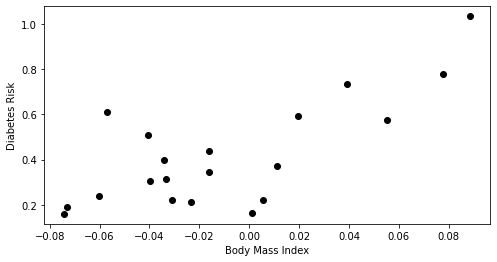

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [8,4]

import numpy as np
import pandas as pd
from sklearn import datasets

# load Dataset
X, y = datasets.load_diabetes(return_X_y=True, as_frame=True)

# Add extra columns of Ones
X["one"] = 1

# Collect 20 data points and only use BMI dimension
X_train = X.iloc[-20:].loc[:, ["bmi", "one"]]
y_train = y.iloc[-20:]/300

plt.scatter(X_train.loc[:, ["bmi"]], y_train, color="black")
plt.xlabel("Body Mass Index")
plt.ylabel("Diabetes Risk")


In [21]:
threshold = 1e-6
step_size = 4e-1
theta, theta_prev = np.array([2, 1]), np.ones(2, )
opt_pts = [theta]
opt_grads = []
iter = 0

while abs(mean_squared_error(theta, X_train, y_train) - mean_squared_error(theta_prev, X_train, y_train)) > threshold:
    if iter % 100 == 0:
        print(f"Iteration {iter}. MSE: {mean_squared_error(theta, X_train, y_train):.6f}")
    theta_prev = theta
    gradient = mse_gradient(theta, X_train, y_train)
    theta = theta_prev - step_size * gradient
    opt_pts += [theta]
    opt_grads += [gradient]
    iter += 1

Iteration 0. MSE: 0.171729
Iteration 100. MSE: 0.014765
Iteration 200. MSE: 0.014349
Iteration 300. MSE: 0.013997
Iteration 400. MSE: 0.013701
Iteration 500. MSE: 0.013450
Iteration 600. MSE: 0.013238
Iteration 700. MSE: 0.013060
Iteration 800. MSE: 0.012909
Iteration 900. MSE: 0.012781


## Ordinary Least Squares

In [26]:
import numpy as np
import pandas as pd
from sklearn import datasets

# load Dataset
X, y = datasets.load_diabetes(return_X_y=True, as_frame=True)

# Add extra columns of Ones
X["one"] = 1

# Collect 20 data points and only use BMI dimension
X_train = X.iloc[-20:]
y_train = y.iloc[-20:]

In [28]:
# This one line function works for invertible matrix
theta_best = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
theta_best_df = pd.DataFrame(data=theta_best[np.newaxis, :], columns=X.columns)
theta_best_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,one
0,-3.888868,204.648785,-64.289163,-262.796691,14003.726808,-11798.307781,-5892.15807,-1136.947646,-2736.597108,-393.879743,155.698998


## Non-Linear Least Squares

In [13]:
import numpy as np
import pandas as pd
from sklearn import datasets

# load Dataset
X, y = datasets.load_diabetes(return_X_y=True, as_frame=True)

# Collect 20 data points and only use BMI dimension
X_train = X.iloc[-20:]
y_train = y.iloc[-20:]

X_bmi = X_train.loc[:, ["bmi"]]
X_bmi_p3 = pd.concat([X_bmi, X_bmi**2, X_bmi**3], axis = 1)
X_bmi_p3.columns = ["bmi", "bmi2", "bmi3"]
X_bmi_p3["one"] = 1

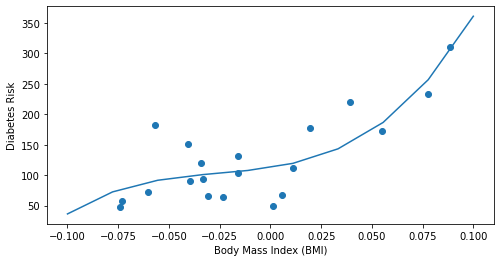

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [8,4]

# Fit Linear Regression (still linear, but using non-linear features)
theta_best = np.linalg.inv(X_bmi_p3.T.dot(X_bmi_p3)).dot(X_bmi_p3.T).dot(y_train)

x_line = np.linspace(-0.1, 0.1, 10)
x_line_p3 = np.stack([x_line, x_line**2, x_line**3, np.ones(10,)], axis=1)
y_train_pred = x_line_p3.dot(theta_best)

plt.xlabel("Body Mass Index (BMI)")
plt.ylabel("Diabetes Risk")
plt.scatter(X_bmi, y_train)
plt.plot(x_line, y_train_pred)